I compare the distribution of APM determined from solutions with different steps, to see if the number of steps used to generate the time series solution affects the distribution of APM.

In [1]:
import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator
import numpy as np
from astropy.table import Table




A function to process the table.

In [ ]:
def parse_apm_table(apm_tab, icrf3_def):
    # Remove no
    mask = apm_tab["num_cln"] >= 5
    apm_tab = apm_tab[mask]

    # convert mas/yr into muas/yr
    apm_tab["pmra"] = apm_tab["pmra"] * 1e3
    apm_tab["pmra_err"] = apm_tab["pmra_err"] * 1e3
    apm_tab["pmdec"] = apm_tab["pmdec"] * 1e3
    apm_tab["pmdec_err"] = apm_tab["pmdec_err"] * 1e3
    
    apm_def = join(icrf3_def, apm_tab, keys="iers_name")
    
    return apm_tab, apm_def

ICRF3 defining source list

In [4]:
icrf3_def = Table.read("../data/icrf3sx-def-sou.txt", format="ascii")

In [3]:
apm_tab4 = Table.read("../data/ts_nju_pm_fit_3sigma.dat", format="ascii.csv")
apm_tab8 = Table.read("../data/ts_nju_pm_fit_3sigma-8step.dat", format="ascii.csv")
apm_tab10 = Table.read("../data/ts_nju_pm_fit_3sigma-10step.dat", format="ascii.csv")
apm_tab20 = Table.read("../data/ts_nju_pm_fit_3sigma-20step.dat", format="ascii.csv")

In [5]:
apm_tab4, apm_def4 = parse_apm_table(apm_tab4, icrf3_def)
apm_tab8, apm_def8 = parse_apm_table(apm_tab8, icrf3_def)
apm_tab10, apm_def10 = parse_apm_table(apm_tab10, icrf3_def)
apm_tab20, apm_def20 = parse_apm_table(apm_tab20, icrf3_def)

In [8]:
bin_array = np.arange(-100, 100, 5)

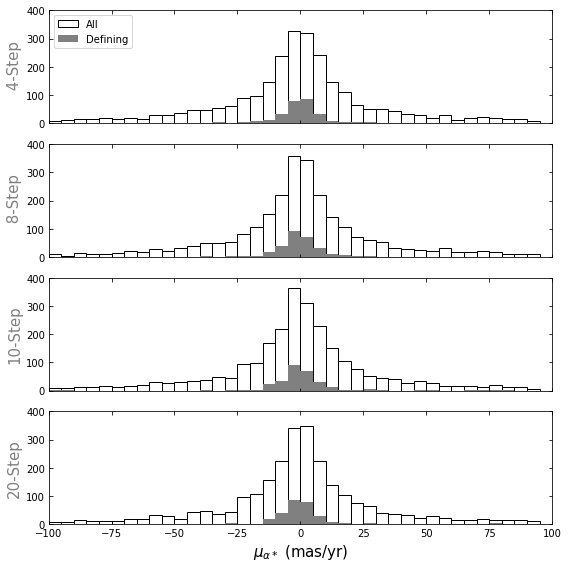

In [16]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(8, 8),
                                         nrows=4,
                                         sharex=True,
                                         sharey=True)

color = "grey"

ax0.hist(apm_tab4["pmra"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax0.hist(apm_def4["pmra"], bins=bin_array, color=color, label="Defining")

ax1.hist(apm_tab8["pmra"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax1.hist(apm_def8["pmra"], bins=bin_array, color=color, label="Defining")

ax2.hist(apm_tab10["pmra"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax2.hist(apm_def10["pmra"], bins=bin_array, color=color, label="Defining")

ax3.hist(apm_tab20["pmra"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax3.hist(apm_def20["pmra"], bins=bin_array, color=color, label="Defining")

ax3.set_xlabel("$\\mu_{\\alpha*}$ (mas/yr)", fontsize=15)

ax0.set_ylabel(" 4-Step", color=color, fontsize=15)
ax1.set_ylabel(" 8-Step", color=color, fontsize=15)
ax2.set_ylabel("10-Step", color=color, fontsize=15)
ax3.set_ylabel("20-Step", color=color, fontsize=15)

ax3.axis([-100, 100, 0, 400])
ax0.legend(loc="upper left")

plt.tight_layout()

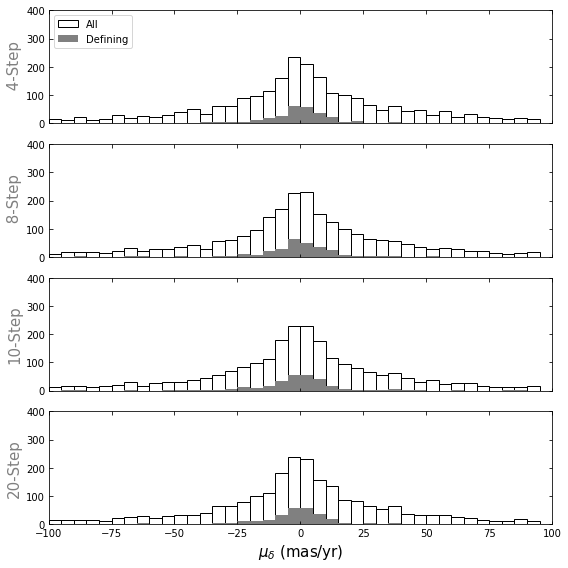

In [17]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(8, 8),
                                         nrows=4,
                                         sharex=True,
                                         sharey=True)

color = "grey"

ax0.hist(apm_tab4["pmdec"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax0.hist(apm_def4["pmdec"], bins=bin_array, color=color, label="Defining")

ax1.hist(apm_tab8["pmdec"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax1.hist(apm_def8["pmdec"], bins=bin_array, color=color, label="Defining")

ax2.hist(apm_tab10["pmdec"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax2.hist(apm_def10["pmdec"], bins=bin_array, color=color, label="Defining")

ax3.hist(apm_tab20["pmdec"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax3.hist(apm_def20["pmdec"], bins=bin_array, color=color, label="Defining")

ax3.set_xlabel("$\\mu_{\\delta}$ (mas/yr)", fontsize=15)

ax0.set_ylabel(" 4-Step", color=color, fontsize=15)
ax1.set_ylabel(" 8-Step", color=color, fontsize=15)
ax2.set_ylabel("10-Step", color=color, fontsize=15)
ax3.set_ylabel("20-Step", color=color, fontsize=15)

ax3.axis([-100, 100, 0, 400])
ax0.legend(loc="upper left")

plt.tight_layout()